In [26]:
import torch
import xarray
from datasets import *
from models import *
import seaborn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train, valid, test = generate_example_dataset()

In [3]:
train2, valid2, test2 = generate_prediction_dataset()

[-4.464256 +5.015576j -4.464256 -5.015576j  2.3826644+6.707389j
  2.3826644-6.707389j]
[[ 0.21150939+0.5625211j   0.21150939-0.5625211j  -0.10744986-0.3911387j
  -0.10744986+0.3911387j ]
 [-0.6184522 +0.j         -0.6184522 -0.j          0.06665314-0.3581952j
   0.06665314+0.3581952j ]
 [-0.06497698-0.06394652j -0.06497698+0.06394652j -0.6904889 +0.j
  -0.6904889 -0.j        ]
 [-0.2820508 +0.41047153j -0.2820508 -0.41047153j -0.03799495+0.47381437j
  -0.03799495-0.47381437j]]


<AxesSubplot:>

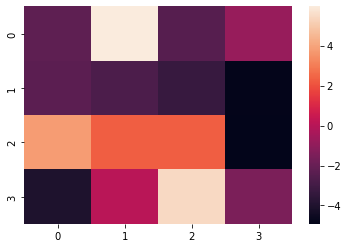

In [52]:
model_kae = koopmanAE(4, steps=4, steps_back=4, alpha=1)
model_kae.load_state_dict(torch.load('saved_models/kae-model-continued-4.082315057579133.pt'))
W = model_kae.dynamics.dynamics.weight.cpu().detach().numpy()
w, v = np.linalg.eig(W)
print(w)
print(v)
v = np.absolute(v)
seaborn.heatmap(W)

In [42]:
model_ae = regularAE(16, 4, 4, alpha=4)
model_ae.load_state_dict(torch.load('saved_models/ae-model-continued-0.5864232216724383.pt'))
W = model_ae.dynamics.dynamics.weight.cpu().detach().numpy()
w, v = np.linalg.eig(W)
v = np.absolute(v)
seaborn.heatmap(v)

AttributeError: 'regularAE' object has no attribute 'dynamics'